## 이미지 인식의 꽃, 컴볼루션 신경망(CNN)
### 1. 이미지를 인식하는 원리

In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# 데이터 로드  
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


print("학습셋 이미지 수: %d 개"% (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개"% (X_test.shape[0]))

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


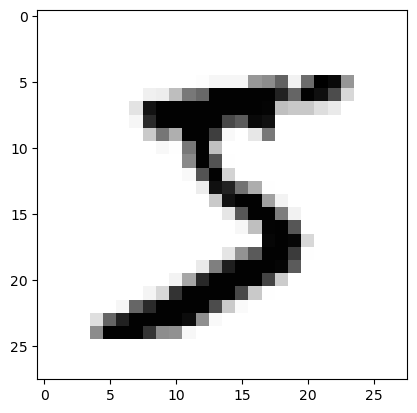

In [16]:
#첫 번째 이미지를 확인
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [17]:
#숫자로 변환된 픽셀값 확인 
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s"%i)
    sys.stdout.write("\n")

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

#딥러닝 기본 모델(MLP: 다층 퍼셉트론)

In [18]:
#딥러닝 기본 모델(MLP: 다층 퍼셉트론)
#차원 변환 과정 : 기본 모델의 경우 2차원 그림을 이해하지 못해 reshape을 통해 784개(25x25)의 긴 줄 1개로 숫자 띠로 만듬
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train /255


X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255
#0~255사이의 픽셀값을 계산을 빠르게 하기 위해 255로 나누어 0~1 사이의 값으로 변환

#클래스 값 확인
print("class: %d " % (Y_train[0]))

#바이너리화 과정 실습 
Y_train = to_categorical(Y_train, 10)


Y_test = to_categorical(Y_test, 10)
print(Y_train[0])

class: 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 2. 딥러닝 기본 프레임 만들기

In [19]:
#딥러닝 기본 모델(MLP: 다층 퍼셉트론)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float64')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
print(X_train.shape)

(60000, 784)


In [21]:
#모델 컴파일 (실행 환경 설정)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#모델 최적화
modelpath="./MNIST_MLP.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
EarlyStopping_callback = EarlyStopping(monitor='val_loss', patience=10)



In [22]:

history = model.fit(X_train, Y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[EarlyStopping_callback, checkpointer])


Epoch 1: val_loss improved from None to 0.18772, saving model to ./MNIST_MLP.keras

Epoch 1: finished saving model to ./MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18772 to 0.13389, saving model to ./MNIST_MLP.keras

Epoch 2: finished saving model to ./MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13389 to 0.11373, saving model to ./MNIST_MLP.keras

Epoch 3: finished saving model to ./MNIST_MLP.keras

Epoch 4: val_loss improved from 0.11373 to 0.09922, saving model to ./MNIST_MLP.keras

Epoch 4: finished saving model to ./MNIST_MLP.keras

Epoch 5: val_loss improved from 0.09922 to 0.09099, saving model to ./MNIST_MLP.keras

Epoch 5: finished saving model to ./MNIST_MLP.keras

Epoch 6: val_loss improved from 0.09099 to 0.08544, saving model to ./MNIST_MLP.keras

Epoch 6: finished saving model to ./MNIST_MLP.keras

Epoch 7: val_loss did not improve from 0.08544

Epoch 8: val_loss improved from 0.08544 to 0.08176, saving model to ./MNIST_MLP.keras

Epoch 8: finished saving mo

In [23]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9810 - loss: 0.0726

 Test Accuracy: 0.9810


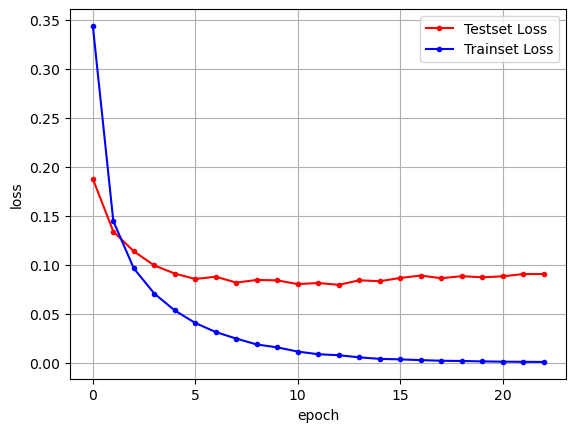

In [24]:

Y_vloss = history.history['val_loss']
Y_loss = history.history['loss']

x_len = np.arange(len(Y_loss))
plt.plot(x_len, Y_vloss, marker='.', c='red', label='Testset Loss')
plt.plot(x_len, Y_loss, marker='.', c='blue', label='Trainset Loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#이미지 전문 모델(CNN: 이미지를 펴지 않고, 모양 그대로 2차원으로 이해 가능)

In [27]:
#이미지 전문 모델(CNN: 이미지를 펴지 않고, 모양 그대로 2차원으로 이해 가능)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping #학습 중간에 모델을 저장, 학습 조기 종료
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical #정답 데이터를 0과 1로 변환(원-핫 인코딩)도구
import matplotlib.pyplot as plt
import numpy as np

# 2. 데이터를 불러오기 및 전처리
(X_train, y_train), (X_test, y_test) = mnist.load_data() #mnist: 실습에 사용할 손글씨 숫자 데이터셋
#괄호 안에 넣은 이유는 반환되는 구조를 설정한 것 

#데이터를 불러올 때의 형태 설정
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
#CNN 입력 데이터가 (이미지 개수, 가로, 세로, 채널)형태여야하므로 
#이미지 개수는 X_train.shape[0]로, 가로와 세로는 28, 채널은 1로 설정
#/255로 정규화
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
#to_categorical: 정답 데이터를 0과 1로 변환(원-핫 인코딩)도구
    #숫자 5를 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]처럼 10개의 클래스로 분류할 수 있는 형태로 바꿈


#CNN 모델 구조 설계 
model = Sequential()
#첫 번째 컨볼루션 층
#32: 필터의 수, kernel_size=(3, 3): 필터의 크기, activation='relu': 활성화 함수, input_shape=(28, 28, 1): 입력 데이터의 형태
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

#두번째 컨볼루션 층
#64: 필터의 수, kernel_size=(3, 3): 필터의 크기, activation='relu': 활성화 함수
model.add(Conv2D(64, (3, 3), activation='relu')) #더 정교한 특징을 가짐
model.add(MaxPooling2D(pool_size=(2, 2))) #특징 맵의 크기를 줄여주는 풀링 층
model.add(Dropout(0.25)) #과적합 방지를 위해 일부 노드를 끄는 기능 (25% 노드를 랜덤하게 끔)
model.add(Flatten()) #2차원 이미지를 1차원으로 펴주는 역할 (이후 Dense층에 넣기 위함)
model.add(Dense(128, activation='relu')) #일반적인 신경망 층
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) #10개의 클래스로 분류

#모델 최적화 설정 구간
modelpath='./MNIST_CNN.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
#val_loss를 모니터 하다가, 이전보다 나아지면 save_best_only=True로 모델을 저장
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
#오차가 10번 연속으로 개선되지 않으면 학습을 중단



#모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 실행
history = model.fit(X_train, Y_train, batch_size=200, epochs=30, verbose=0, validation_split=0.25, callbacks =[early_stopping_callback, checkpointer])
# batch_size=200: 문제 200개 풀 때마다 정답 맞추기
#epochs=30: 총 30번 훈련 (문제집 30번 반복)
#verbose=0: 훈련 과정을 화면에 출력하지 않음
#validation_split=0.25: 25%의 데이터를 검증용으로 사용
#callbacks =[early_stopping_callback, checkpointer]: 학습 중간에 모델을 저장하고, 오차가 10번 연속으로 개선되지 않으면 학습을 중단

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from None to 0.08083, saving model to ./MNIST_CNN.keras

Epoch 1: finished saving model to ./MNIST_CNN.keras

Epoch 2: val_loss improved from 0.08083 to 0.05861, saving model to ./MNIST_CNN.keras

Epoch 2: finished saving model to ./MNIST_CNN.keras

Epoch 3: val_loss improved from 0.05861 to 0.04821, saving model to ./MNIST_CNN.keras

Epoch 3: finished saving model to ./MNIST_CNN.keras

Epoch 4: val_loss improved from 0.04821 to 0.04458, saving model to ./MNIST_CNN.keras

Epoch 4: finished saving model to ./MNIST_CNN.keras

Epoch 5: val_loss did not improve from 0.04458

Epoch 6: val_loss improved from 0.04458 to 0.04272, saving model to ./MNIST_CNN.keras

Epoch 6: finished saving model to ./MNIST_CNN.keras

Epoch 7: val_loss did not improve from 0.04272

Epoch 8: val_loss improved from 0.04272 to 0.04251, saving model to ./MNIST_CNN.keras

Epoch 8: finished saving model to ./MNIST_CNN.keras

Epoch 9: val_loss did not improve from 0.04251

Epoch 10: val_loss

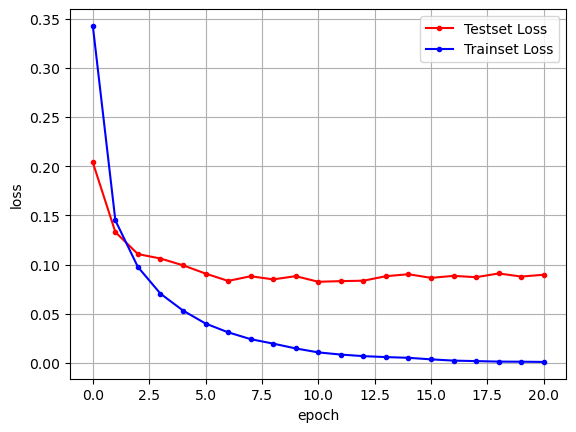

In [ ]:
#검증셋과 학습셋의 오차를 저장
Y_vloss = history.history['val_loss']
Y_loss = history.history['loss']

#그래프로 표현
X_len = np.arange(len(Y_loss))
plt.plot(X_len, Y_vloss, marker='.', c='red', label='Testset Loss')
plt.plot(X_len, Y_loss, marker='.', c='blue', label='Trainset Loss')

#그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()